In [ ]:
pip install --upgrade torch

In [2]:
import torch
# Check if CUDA is available and set the device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [4]:
# Importing necessary PyTorch and NumPy libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np

# Definition of a simple VAE (Variational Autoencoder) model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()

        # Encoder layer
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),  # Linear layer
            nn.ReLU(),  # ReLU activation function
            nn.Linear(hidden_size, latent_size * 2)  # Linear layer with double the output size (distribution parameters: mean and log-variance)
        )

        # Decoder layer
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),  # Linear layer
            nn.ReLU(),  # ReLU activation function
            nn.Linear(hidden_size, input_size),  # Linear layer
            nn.Sigmoid()  # Sigmoid activation function at the end to get values between 0 and 1
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)  # Calculating the standard deviation
        eps = torch.randn_like(std)    # Random sample from normal distribution
        return mu + eps * std  # Sampling from normal distribution

    def forward(self, x):
        # Encoder
        x = self.encoder(x)
        mu, logvar = x.chunk(2, dim=1)  # Splitting the results into mean and log-variance
        z = self.reparameterize(mu, logvar)  # Sampling from normal distribution
        # Decoder
        x_hat = self.decoder(z)
        return x_hat, mu, logvar

# Definition of the VAE (Variational Autoencoder) loss function
def loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')  # Binary Cross-Entropy
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())  # Kullback-Leibler Divergence
    return BCE + KLD  # Total loss function

# Data preparation (using MNIST as an example)
batch_size = 64
transform = transforms.Compose([transforms.ToTensor()])
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='./Datasets/9_VAE_Data/MNIST', train=True, transform=transform, download=True),
                                           batch_size=batch_size, shuffle=True)

# Initializing the VAE model
input_size = 784  # 28x28 pixels
hidden_size = 256
latent_size = 20
vae = VAE(input_size, hidden_size, latent_size)

# Definition of the optimizer (Adam)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

vae.to(device)

# Training the VAE model for a specified number of epochs
num_epochs = 60
for epoch in range(num_epochs):
    vae.train()  # Switching the model to training mode
    total_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.view(-1, input_size).to(device)  # Ensuring the correct shape of the input data and moving to GPU if available
        optimizer.zero_grad()  # Zeroing gradients
        recon_batch, mu, logvar = vae(data)  # Passing the data through the VAE model
        loss = loss_function(recon_batch, data, mu, logvar)  # Calculating the VAE loss function
        loss.backward()  # Backpropagation
        total_loss += loss.item()
        optimizer.step()  # Updating model weights
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader.dataset):.4f}')

# Generating samples from the VAE model
vae.eval()  # Switching the model to evaluation mode
with torch.no_grad():
    z = torch.randn(64, latent_size).to(device)  # Random samples from normal distribution and moving to GPU if available
    generated_samples = vae.decoder(z).view(-1, 1, 28, 28)  # Generating samples
torch.save(vae.state_dict(), "./Models/MNIST_VAE_model.pth")

100%|██████████| 9912422/9912422 [05:02<00:00, 32788.43it/s]


Extracting ./Datasets/9_VAE_Data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./Datasets/9_VAE_Data/MNIST/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 212307.94it/s]


Extracting ./Datasets/9_VAE_Data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./Datasets/9_VAE_Data/MNIST/MNIST/raw



100%|██████████| 1648877/1648877 [00:50<00:00, 32647.31it/s]


Extracting ./Datasets/9_VAE_Data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Datasets/9_VAE_Data/MNIST/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13774785.80it/s]


Extracting ./Datasets/9_VAE_Data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Datasets/9_VAE_Data/MNIST/MNIST/raw

Epoch [1/60], Loss: 155.0585
Epoch [2/60], Loss: 119.3006
Epoch [3/60], Loss: 113.7635
Epoch [4/60], Loss: 111.3298
Epoch [5/60], Loss: 109.9025
Epoch [6/60], Loss: 108.9576
Epoch [7/60], Loss: 108.2407
Epoch [8/60], Loss: 107.7720
Epoch [9/60], Loss: 107.3174
Epoch [10/60], Loss: 106.9911
Epoch [11/60], Loss: 106.6607
Epoch [12/60], Loss: 106.4244
Epoch [13/60], Loss: 106.1879
Epoch [14/60], Loss: 106.0096
Epoch [15/60], Loss: 105.7942
Epoch [16/60], Loss: 105.6754
Epoch [17/60], Loss: 105.5775
Epoch [18/60], Loss: 105.4343
Epoch [19/60], Loss: 105.3060
Epoch [20/60], Loss: 105.1326
Epoch [21/60], Loss: 105.0867
Epoch [22/60], Loss: 104.9145
Epoch [23/60], Loss: 104.7972
Epoch [24/60], Loss: 104.7565
Epoch [25/60], Loss: 104.6862
Epoch [26/60], Loss: 104.5664
Epoch [27/60], Loss: 104.4880
Epoch [28/60], Loss: 104.4285
Epoch [29/60], Loss: 104.3266
Epoch [30/60], Loss: 1

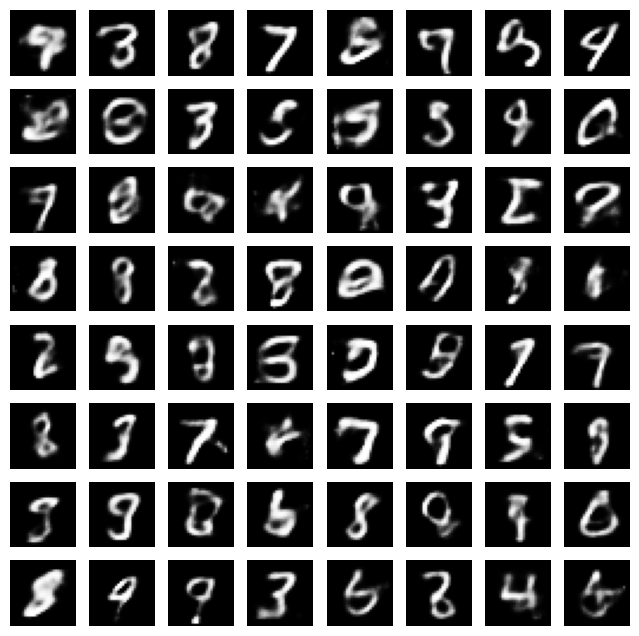

In [6]:
# Displaying generated samples using the Matplotlib library
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
generated_samples = generated_samples.cpu()
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(generated_samples[i].squeeze(), cmap='gray')  # Displaying the generated sample
    plt.axis('off')  # Turning off the axis
plt.show()  # Displaying the plot with generated samples

In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Data preparation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./Datasets/9_VAE_Data/Fashion-MNIST', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

1. VAE Model Modification:
   - Adapt the VAE architecture to fit the Fashion-MNIST data. Pay attention to the input and output dimensions, which should match the size of images in the dataset (28x28 pixels).

2. Model Training:
   - Train the VAE model on the Fashion-MNIST training data. Monitor the loss function during training.

3. Results Analysis:
   - Conduct an analysis of reconstruction quality by comparing original images with their reconstructions by the VAE model.
   - Generate new fashion images by sampling from the latent space and passing the samples through the decoder.

In [9]:
# Modifying the VAE Model
class VAE(nn.Module):
    def __init__(self, input_size, hidden_size, latent_size):
        super(VAE, self).__init__()

        # Encoder layer
        self.encoder = nn.Sequential(
            nn.Linear(input_size, hidden_size),  # Linear layer
            nn.ReLU(),  # ReLU activation function
            nn.Linear(hidden_size, latent_size * 2)  # Linear layer with double the output size (distribution parameters: mean and log-variance)
        )

        # Decoder layer
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, hidden_size),  # Linear layer
            nn.ReLU(),  # ReLU activation function
            nn.Linear(hidden_size, input_size),  # Linear layer
            nn.Sigmoid()  # Sigmoid activation function at the end to get values between 0 and 1
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)  # Calculating the standard deviation
        eps = torch.randn_like(std)    # Random sample from normal distribution
        return mu + eps * std  # Sampling from normal distribution

    def forward(self, x):
        # Encoder
        x = x.view(-1, 28 * 28)  # Ensuring the correct shape of the input data
        x = self.encoder(x)
        mu, logvar = x.chunk(2, dim=1)  # Splitting the results into mean and log-variance
        z = self.reparameterize(mu, logvar)  # Sampling from normal distribution
        # Decoder
        x_hat = self.decoder(z)
        return x_hat, mu, logvar

# Data preparation (using Fashion-MNIST as an example)
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.FashionMNIST(root='./Datasets/9_VAE_Data/Fashion-MNIST', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

# Initializing the VAE model
input_size = 28 * 28  # 28x28 pixels
hidden_size = 256
latent_size = 20
vae = VAE(input_size, hidden_size, latent_size)

# Definition of the optimizer (Adam)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Training the VAE model for a specified number of epochs
num_epochs = 60
for epoch in range(num_epochs):
    vae.train()  # Switching the model to training mode
    total_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()  # Zeroing gradients
        recon_batch, mu, logvar = vae(data)  # Passing the data through the VAE model
        loss = loss_function(recon_batch, data.view(-1, input_size), mu, logvar)  # Calculating the VAE loss function
        loss.backward()  # Backpropagation
        total_loss += loss.item()
        optimizer.step()  # Updating model weights
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader.dataset):.4f}')
torch.save(vae.state_dict(), "./Models/Fashion-MNIST_VAE_model.pth")

Epoch [1/60], Loss: 278.4290
Epoch [2/60], Loss: 254.1930
Epoch [3/60], Loss: 249.2911
Epoch [4/60], Loss: 246.8643
Epoch [5/60], Loss: 245.5137
Epoch [6/60], Loss: 244.6291
Epoch [7/60], Loss: 243.9613
Epoch [8/60], Loss: 243.4212
Epoch [9/60], Loss: 242.9993
Epoch [10/60], Loss: 242.6096
Epoch [11/60], Loss: 242.3299
Epoch [12/60], Loss: 242.0232
Epoch [13/60], Loss: 241.7609
Epoch [14/60], Loss: 241.5899
Epoch [15/60], Loss: 241.4086
Epoch [16/60], Loss: 241.2252
Epoch [17/60], Loss: 241.0937
Epoch [18/60], Loss: 240.9522
Epoch [19/60], Loss: 240.8472
Epoch [20/60], Loss: 240.7362
Epoch [21/60], Loss: 240.6033
Epoch [22/60], Loss: 240.5533
Epoch [23/60], Loss: 240.4692
Epoch [24/60], Loss: 240.3776
Epoch [25/60], Loss: 240.2984
Epoch [26/60], Loss: 240.2668
Epoch [27/60], Loss: 240.1817
Epoch [28/60], Loss: 240.1162
Epoch [29/60], Loss: 240.0780
Epoch [30/60], Loss: 239.9842
Epoch [31/60], Loss: 239.9584
Epoch [32/60], Loss: 239.9130
Epoch [33/60], Loss: 239.8455
Epoch [34/60], Loss

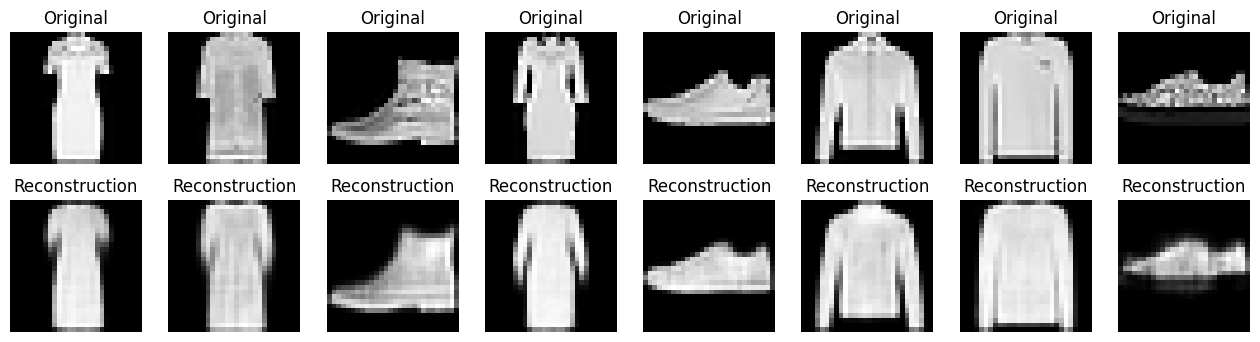

In [43]:
# Results Analysis

# Reconstructing images from the training dataset
vae.eval()  # Switching the model to evaluation mode
with torch.no_grad():
    data_iter = iter(train_loader)
    images, _ = next(data_iter)  # Using the next() function
    reconstructions, _, _ = vae(images)

# Displaying original images and their reconstructions
plt.figure(figsize=(16, 4))
for i in range(8):
    # Original
    plt.subplot(2, 8, i + 1)
    plt.imshow(images[i].view(28, 28).numpy(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstruction
    plt.subplot(2, 8, i + 9)
    plt.imshow(reconstructions[i].view(28, 28).numpy(), cmap='gray')
    plt.title("Reconstruction")
    plt.axis('off')

plt.show()